In [28]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import fcluster
import pandas_profiling
from scipy.cluster.hierarchy import fcluster

In [18]:
pd.set_option('display.max_columns', 500)

In [2]:
featurePath=r'C:\Users\x190523\Desktop\earlyAfternoonLate.csv'
dfFeature= pd.read_csv (featurePath)

In [4]:
pandas_profiling.ProfileReport(dfFeature)

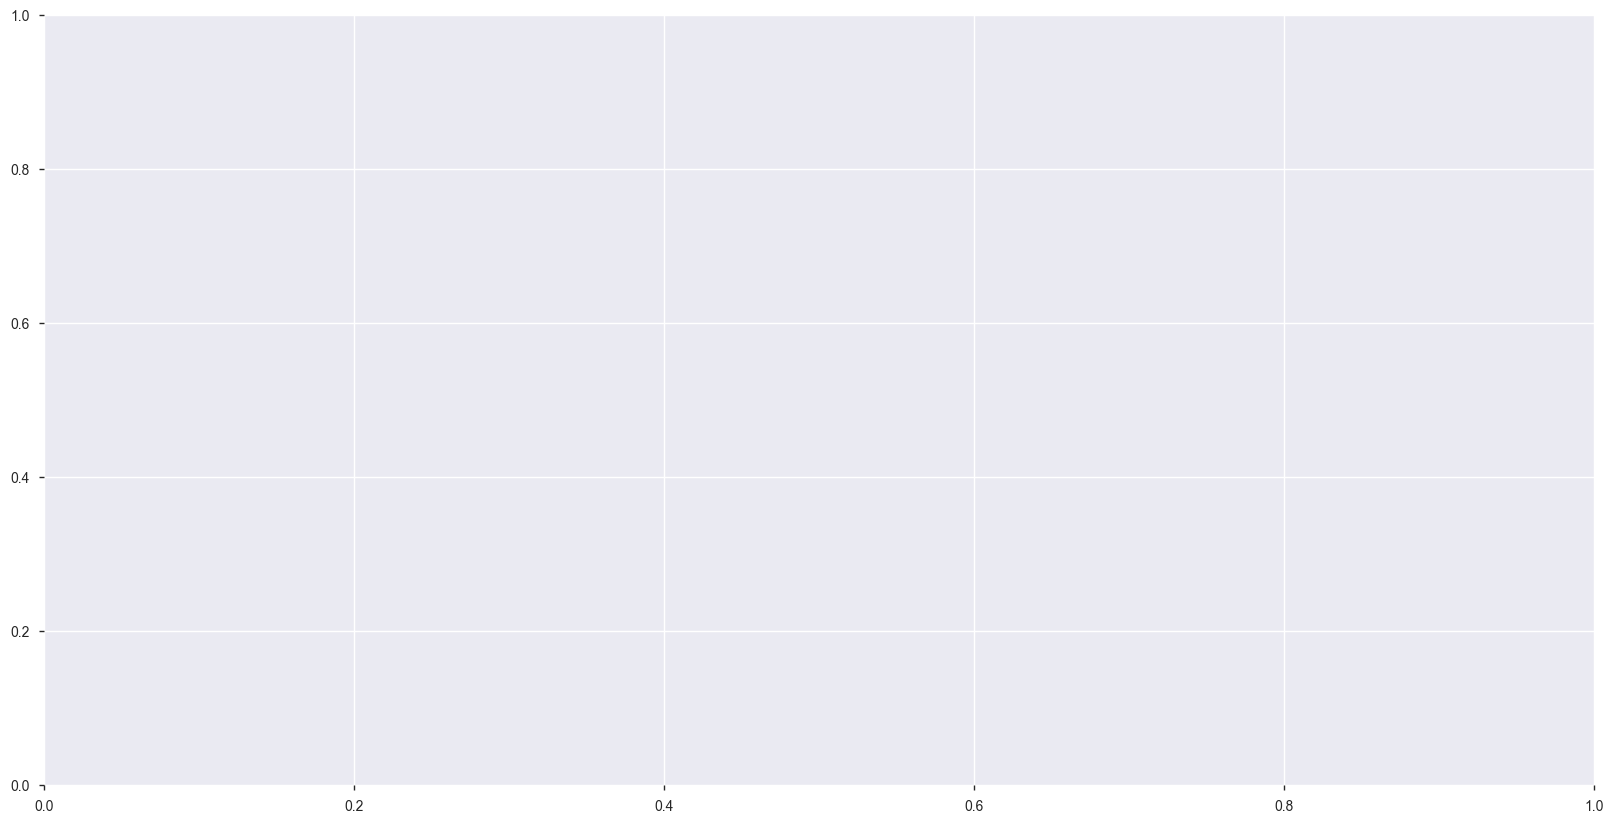

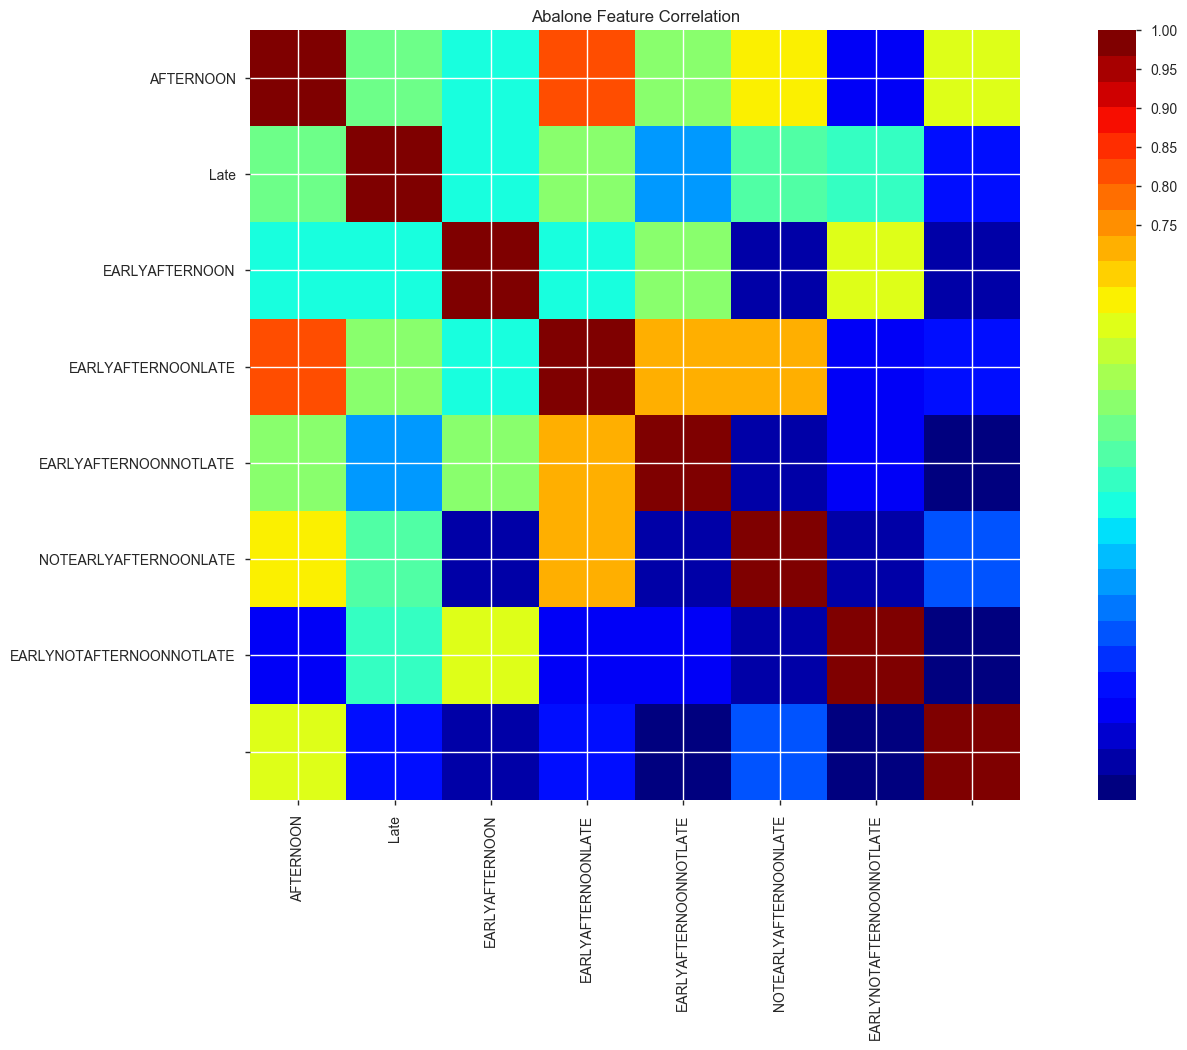

In [8]:
def correlation_matrix(dfFeature):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(dfFeature.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['EARLY','AFTERNOON','Late','EARLYAFTERNOON','EARLYAFTERNOONLATE','EARLYAFTERNOONNOTLATE','NOTEARLYAFTERNOONLATE','EARLYNOTAFTERNOONNOTLATE']
    ax1.set_xticklabels(labels,fontsize=10, rotation=90)
    ax1.set_yticklabels(labels,fontsize=10)
    
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(dfFeature.ix[:, dfFeature.columns!='hashedImsi'])

In [9]:
dfCorrelation=dfFeature.ix[:, dfFeature.columns!='hashedImsi'].corr()

In [10]:
dfCorrelation

,TOTALEARLYPRESENCE,TOTALAFTERNOONPRESENCE,TOTALLATEPRESENCE,TOTALEARLYAFTERNOONPRESENCE,TOTALEARLYAFTERNOONLATEPRESENCE,TOTALEARLYAFTERNOONNOTLATEPRESENCE,TOTALNOTEARLYAFTERNOONLATEPRESENCE,TOTALEARLYNOTAFTERNOONNOTLATEPRESENCE
TOTALEARLYPRESENCE,1.000000,0.485761,0.383632,0.823472,0.533493,0.663989,0.143704,0.636874
TOTALAFTERNOONPRESENCE,0.485761,1.000000,0.383258,0.523032,0.285668,0.468606,0.436323,0.168310
TOTALLATEPRESENCE,0.383632,0.383258,1.000000,0.404310,0.520284,0.065937,0.626041,0.050416
TOTALEARLYAFTERNOONPRESENCE,0.823472,0.523032,0.404310,1.000000,0.726291,0.729664,0.146008,0.163966
TOTALEARLYAFTERNOONLATEPRESENCE,0.533493,0.285668,0.520284,0.726291,1.000000,0.065770,0.143753,0.015333
TOTALEARLYAFTERNOONNOTLATEPRESENCE,0.663989,0.468606,0.065937,0.729664,0.065770,1.000000,0.060928,0.222644
TOTALNOTEARLYAFTERNOONLATEPRESENCE,0.143704,0.436323,0.626041,0.146008,0.143753,0.060928,1.000000,0.020997
TOTALEARLYNOTAFTERNOONNOTLATEPRESENCE,0.636874,0.168310,0.050416,0.163966,0.015333,0.222644,0.020997,1.000000


In [19]:
dfFeature.head()

,HASHEDIMSI,TOTALAVTIVEDAYS,TOTALACTIVEWEEKS,MEDIAN_STAY,WEEKEND_SHOWUPCNT,WEEKDAYS_SHOWUPCNT,EARLYS,EVENINGS,LATES,EARLYEVENING,EARLYEVENINGLATE,EARLYEVENINGNOTLATE,NOTEARLYEVENINGNOTLATE,NOTEARLYNOTEVENINGLATE
0,C5E90D6A6E8B3DFE3E700AE09033212C251BFA111CFBC3...,10,5,4.0,0,10,0,6,0,0,0,0,6,0
1,9DC85768C79188DFDCAE3331CEDCBEE02DBEF02A97B8F4...,1,1,1.0,0,1,0,1,0,0,0,0,1,0
2,BF94223A3545D531E3829D04E1F63EA6B00B4FB7DF3430...,18,4,8.0,6,12,0,2,11,0,0,0,1,8
3,D83B5AD421B421FC52F69EC937653CD8A9A669BA378238...,1,1,3.0,1,0,0,1,0,0,0,0,1,0
4,5A9758FDC89662F3DCB8778630C3B6271850AB97F6DBDC...,1,1,3.0,0,1,0,1,0,0,0,0,1,0


In [20]:
dfFeaturesScaled= dfFeature.copy()
dfFeaturesScaled[['TOTALAVTIVEDAYS','TOTALACTIVEWEEKS','MEDIAN_STAY','WEEKEND_SHOWUPCNT','WEEKDAYS_SHOWUPCNT','EARLYS','EVENINGS','LATES','EARLYEVENING','EARLYEVENINGLATE','EARLYEVENINGNOTLATE','NOTEARLYEVENINGNOTLATE','NOTEARLYNOTEVENINGLATE']]= dfFeaturesScaled1234.ix[:,dfFeaturesScaled1234.columns!='HASHEDIMSI'].apply(lambda x: preprocessing.minmax_scale(x,feature_range=(0, 1) ))

dfFeaturesScaled.head()

C:\Users\x190523\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\Users\x190523\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, _DataConversionWarning)


,HASHEDIMSI,TOTALAVTIVEDAYS,TOTALACTIVEWEEKS,MEDIAN_STAY,WEEKEND_SHOWUPCNT,WEEKDAYS_SHOWUPCNT,EARLYS,EVENINGS,LATES,EARLYEVENING,EARLYEVENINGLATE,EARLYEVENINGNOTLATE,NOTEARLYEVENINGNOTLATE,NOTEARLYNOTEVENINGLATE
0,C5E90D6A6E8B3DFE3E700AE09033212C251BFA111CFBC3...,0.310345,0.8,0.136364,0.000000,0.476190,0.0,0.200000,0.000000,0.0,0.0,0.0,0.333333,0.000000
1,9DC85768C79188DFDCAE3331CEDCBEE02DBEF02A97B8F4...,0.000000,0.0,0.000000,0.000000,0.047619,0.0,0.033333,0.000000,0.0,0.0,0.0,0.055556,0.000000
2,BF94223A3545D531E3829D04E1F63EA6B00B4FB7DF3430...,0.586207,0.6,0.318182,0.666667,0.571429,0.0,0.066667,0.366667,0.0,0.0,0.0,0.055556,0.666667
3,D83B5AD421B421FC52F69EC937653CD8A9A669BA378238...,0.000000,0.0,0.090909,0.111111,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.0,0.055556,0.000000
4,5A9758FDC89662F3DCB8778630C3B6271850AB97F6DBDC...,0.000000,0.0,0.090909,0.000000,0.047619,0.0,0.033333,0.000000,0.0,0.0,0.0,0.055556,0.000000


# Two-phase clustering
## with scaling

In [21]:
dfClusteringInputScaled=dfFeaturesScaled.ix[:, dfFeaturesScaled.columns != 'HASHEDIMSI']

## Phase 1: Mini Batch K-Means

In [22]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=500, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)

clusterMiniBatchScaled=mbk.fit(dfClusteringInputScaled)

firstPhaseClusterScaled=clusterMiniBatchScaled.cluster_centers_ 
first_mappingScaled = {case:cluster for case,
 cluster in enumerate(clusterMiniBatchScaled.labels_)}

C:\Users\x190523\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cluster\k_means_.py:1381: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  init_size=init_size)


In [23]:
len (first_mappingScaled.items())

45180

## Phase2: Hierarchical

In [24]:
ZcompleteScaled = linkage(firstPhaseClusterScaled, method='complete')
ZwardScaled = linkage(firstPhaseClusterScaled, method='ward')
ZsingleScaled = linkage(firstPhaseClusterScaled, method='single')
ZaverageScaled= linkage(firstPhaseClusterScaled, method='average')

In [25]:
len(ZaverageScaled)

499

## Elbow method to find optimal number of clusters

In [26]:
# some setting for this notebook to actually show the graphs inline, you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

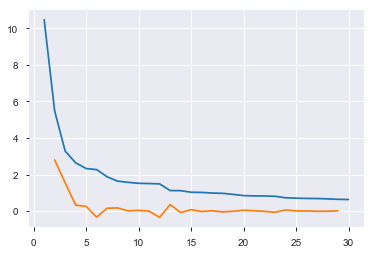

('clusters for ward method:', 2)


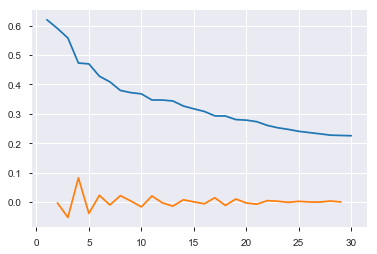

('clusters for single method:', 4)


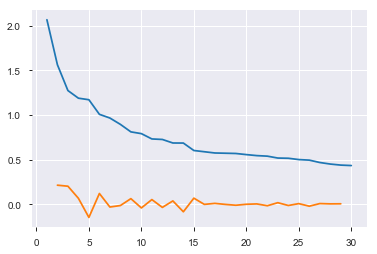

('clusters for complete method:', 2)


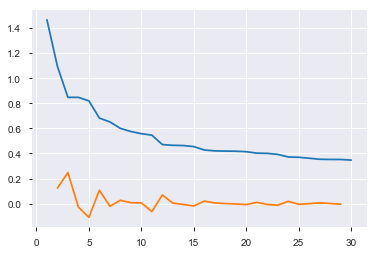

('clusters for average method:', 3)


In [27]:
lastward = ZwardScaled[-30:, 2]
last_revward = lastward[::-1]
idxsward = np.arange(1, len(lastward) + 1)
plt.plot(idxsward, last_revward)

accelerationward = np.diff(lastward, 2)  # 2nd derivative of the distances
acceleration_revward = accelerationward[::-1]
plt.plot(idxsward[:-2] + 1, acceleration_revward)
plt.show()
kward = acceleration_revward.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for ward method:", kward)

##
lastsingle = ZsingleScaled[-30:, 2]
last_revsingle = lastsingle[::-1]
idxssingle = np.arange(1, len(lastsingle) + 1)
plt.plot(idxssingle, last_revsingle)

accelerationsingle = np.diff(lastsingle, 2)  # 2nd derivative of the distances
acceleration_revsingle= accelerationsingle[::-1]
plt.plot(idxssingle[:-2] + 1, acceleration_revsingle)
plt.show()
ksingle = acceleration_revsingle.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for single method:", ksingle)

##
lastcomplete = ZcompleteScaled1234[-30:, 2]
last_revcomplete = lastcomplete[::-1]
idxscomplete = np.arange(1, len(lastcomplete) + 1)
plt.plot(idxscomplete, last_revcomplete)

accelerationcomplete = np.diff(lastcomplete, 2)  # 2nd derivative of the distances
acceleration_revcomplete = accelerationcomplete[::-1]
plt.plot(idxscomplete[:-2] + 1, acceleration_revcomplete)
plt.show()
kcomplete = acceleration_revcomplete.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for complete method:", kcomplete)

##
lastaverage = ZaverageScaled1234[-30:, 2]
last_revaverage = lastaverage[::-1]
idxsaverage = np.arange(1, len(lastaverage) + 1)
plt.plot(idxsaverage, last_revaverage)

accelerationaverage = np.diff(lastaverage, 2)  # 2nd derivative of the distances
acceleration_revaverage = accelerationaverage[::-1]
plt.plot(idxsaverage[:-2] + 1, acceleration_revaverage)
plt.show()
kaverage = acceleration_revaverage.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for average method:", kaverage)

In [30]:
# 2- Knowing k:

k=3
clustersAverageScaled = fcluster(ZaverageScaled, k, criterion='maxclust')
clustersAverageScaled

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [33]:
secound_mappingAverageScaled = {case:cluster for case,
 cluster in enumerate(clustersAverageScaled)}
final_mappingAverageScaled = {case:secound_mappingAverageScaled[first_mappingScaled[case]]
 for case in first_mappingScaled}
dfResult2PhasesAverageScaled=dfFeaturesScaled.copy()
dfResult2PhasesAverageScaled['BatchAvg3']=final_mappingAverageScaled.values()
#dfTotalResult['BatchWard2']=final_mappingWard.values()

In [34]:
dfResult2PhasesAverageScaled.groupby('BatchAvg3')['HASHEDIMSI'].agg(len)

BatchAvg3
1    45100
2       60
3       20
Name: HASHEDIMSI, dtype: int64

In [37]:
# 2- Knowing k:

k=4
clustersSingleScaled = fcluster(ZsingleScaled, k, criterion='maxclust')

secound_mappingSingleScaled = {case:cluster for case,
 cluster in enumerate(clustersSingleScaled)}
final_mappingSingleScaled = {case:secound_mappingSingleScaled[first_mappingScaled[case]]
 for case in first_mappingScaled}

dfResult2PhasesSingleScaled= dfFeaturesScaled.copy()
dfResult2PhasesSingleScaled['Batchsingle4']=final_mappingSingleScaled.values()
#dfTotalResult['BatchWard2']=final_mappingWard.values()




In [38]:
dfResult2PhasesSingleScaled.groupby('Batchsingle4')['HASHEDIMSI'].agg(len)

Batchsingle4
1    45139
2       16
3        5
4       20
Name: HASHEDIMSI, dtype: int64

## without scaling

In [39]:
dfClusteringInput=dfFeature.ix[:, dfFeature.columns != 'HASHEDIMSI']


C:\Users\x190523\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [42]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=500, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)

clusterMiniBatch=mbk.fit(dfClusteringInput)
firstPhaseCluster=clusterMiniBatch.cluster_centers_ 
first_mapping = {case:cluster for case,
 cluster in enumerate(clusterMiniBatch.labels_)}

## Phase2: Hierarchical

In [43]:
Zcomplete = linkage(firstPhaseCluster, method='complete')
Zward = linkage(firstPhaseCluster, method='ward')
Zsingle = linkage(firstPhaseCluster, method='single')
Zaverage= linkage(firstPhaseCluster, method='average')

In [44]:
len(Zaverage)

499

## Elbow method to find optimal number of clusters

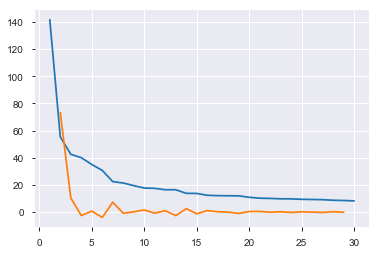

('clusters for ward method:', 2)


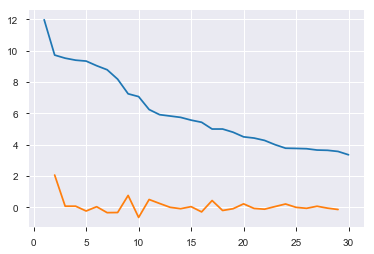

('clusters for single method:', 2)


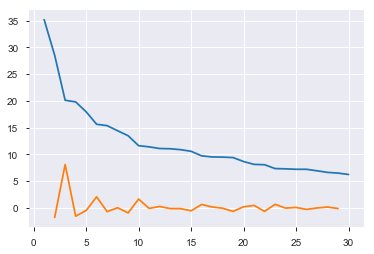

('clusters for complete method:', 3)


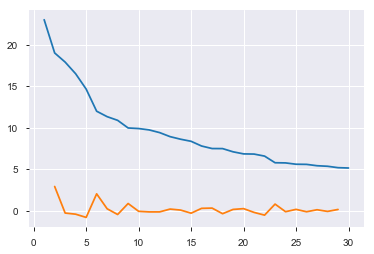

('clusters for average method:', 2)


In [45]:
lastward = Zward[-30:, 2]
last_revward = lastward[::-1]
idxsward = np.arange(1, len(lastward) + 1)
plt.plot(idxsward, last_revward)

accelerationward = np.diff(lastward, 2)  # 2nd derivative of the distances
acceleration_revward = accelerationward[::-1]
plt.plot(idxsward[:-2] + 1, acceleration_revward)
plt.show()
kward = acceleration_revward.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for ward method:", kward)

##
lastsingle = Zsingle[-30:, 2]
last_revsingle = lastsingle[::-1]
idxssingle = np.arange(1, len(lastsingle) + 1)
plt.plot(idxssingle, last_revsingle)

accelerationsingle = np.diff(lastsingle, 2)  # 2nd derivative of the distances
acceleration_revsingle= accelerationsingle[::-1]
plt.plot(idxssingle[:-2] + 1, acceleration_revsingle)
plt.show()
ksingle = acceleration_revsingle.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for single method:", ksingle)

##
lastcomplete = Zcomplete[-30:, 2]
last_revcomplete = lastcomplete[::-1]
idxscomplete = np.arange(1, len(lastcomplete) + 1)
plt.plot(idxscomplete, last_revcomplete)

accelerationcomplete = np.diff(lastcomplete, 2)  # 2nd derivative of the distances
acceleration_revcomplete = accelerationcomplete[::-1]
plt.plot(idxscomplete[:-2] + 1, acceleration_revcomplete)
plt.show()
kcomplete = acceleration_revcomplete.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for complete method:", kcomplete)

##
lastaverage = Zaverage[-30:, 2]
last_revaverage = lastaverage[::-1]
idxsaverage = np.arange(1, len(lastaverage) + 1)
plt.plot(idxsaverage, last_revaverage)

accelerationaverage = np.diff(lastaverage, 2)  # 2nd derivative of the distances
acceleration_revaverage = accelerationaverage[::-1]
plt.plot(idxsaverage[:-2] + 1, acceleration_revaverage)
plt.show()
kaverage = acceleration_revaverage.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for average method:", kaverage)

In [47]:
# 2- Knowing k:

k=2
clustersWard = fcluster(Zward, k, criterion='maxclust')

secound_mappingWard = {case:cluster for case,
 cluster in enumerate(clustersWard)}
final_mappingWard = {case:secound_mappingWard[first_mapping[case]]
 for case in first_mapping}

dfResult2PhasesWard= dfFeature.copy()
dfResult2PhasesWard['BatchWard2']=final_mappingWard.values()
#dfTotalResult['BatchWard2']=final_mappingWard.values()




In [48]:
dfResult2PhasesWard.groupby('BatchWard2')['HASHEDIMSI'].agg(len)

BatchWard2
1     1302
2    43878
Name: HASHEDIMSI, dtype: int64

In [49]:
dfResult2PhasesWard.ix[dfResult2PhasesWard['BatchWard2']==1].head()

C:\Users\x190523\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,HASHEDIMSI,TOTALAVTIVEDAYS,TOTALACTIVEWEEKS,MEDIAN_STAY,WEEKEND_SHOWUPCNT,WEEKDAYS_SHOWUPCNT,EARLYS,EVENINGS,LATES,EARLYEVENING,EARLYEVENINGLATE,EARLYEVENINGNOTLATE,NOTEARLYEVENINGNOTLATE,NOTEARLYNOTEVENINGLATE,BatchWard2
0,C5E90D6A6E8B3DFE3E700AE09033212C251BFA111CFBC3...,10,5,4.0,0,10,0,6,0,0,0,0,6,0,1
2,BF94223A3545D531E3829D04E1F63EA6B00B4FB7DF3430...,18,4,8.0,6,12,0,2,11,0,0,0,1,8,1
5,D0DB22B99CA15AC4261215EA2A979592A3856396EC61D4...,24,6,7.0,6,18,2,18,5,1,0,1,9,0,1
6,58BAAF199B110E3765B506C56C99EF79CDF52F31AD2068...,9,4,3.0,0,9,2,2,0,0,0,0,2,0,1
7,8F7DFEB0FE8CA40EFCCEC705C01DDED89D1240D5C2B38A...,20,5,4.0,0,20,2,15,0,1,0,1,14,0,1


In [50]:
dfAllStaffs=dfResult2PhasesWard.ix[dfResult2PhasesWard['BatchWard2']==1].copy()

In [51]:
dfAllStaffs.shape

(1302, 15)

# phase 3

In [54]:
dfAllStaffsInput=dfAllStaffs.ix[:, dfAllStaffs.columns != 'HASHEDIMSI']
ZcompleteStaffs = linkage(dfAllStaffsInput, method='complete')
ZwardStaffs = linkage(dfAllStaffsInput, method='ward')
ZsingleStaffs = linkage(dfAllStaffsInput, method='single')
ZaverageStaffs= linkage(dfAllStaffsInput, method='average')

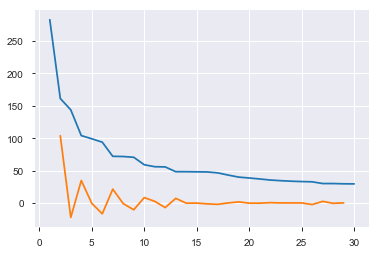

('clusters for ward method:', 2)


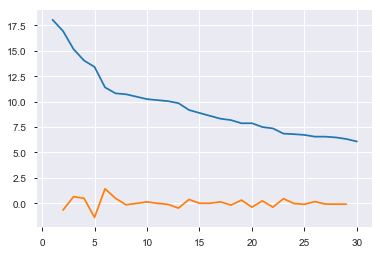

('clusters for single method:', 6)


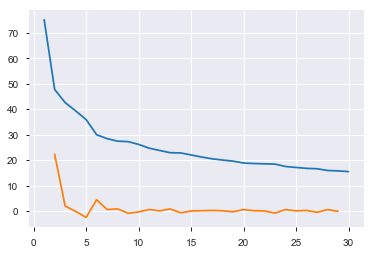

('clusters for complete method:', 2)


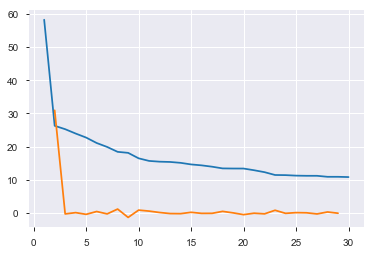

('clusters for average method:', 2)


In [55]:
lastward = ZwardStaffs[-30:, 2]
last_revward = lastward[::-1]
idxsward = np.arange(1, len(lastward) + 1)
plt.plot(idxsward, last_revward)

accelerationward = np.diff(lastward, 2)  # 2nd derivative of the distances
acceleration_revward = accelerationward[::-1]
plt.plot(idxsward[:-2] + 1, acceleration_revward)
plt.show()
kward = acceleration_revward.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for ward method:", kward)

##
lastsingle = ZsingleStaffs[-30:, 2]
last_revsingle = lastsingle[::-1]
idxssingle = np.arange(1, len(lastsingle) + 1)
plt.plot(idxssingle, last_revsingle)

accelerationsingle = np.diff(lastsingle, 2)  # 2nd derivative of the distances
acceleration_revsingle= accelerationsingle[::-1]
plt.plot(idxssingle[:-2] + 1, acceleration_revsingle)
plt.show()
ksingle = acceleration_revsingle.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for single method:", ksingle)

##
lastcomplete = ZcompleteStaffs[-30:, 2]
last_revcomplete = lastcomplete[::-1]
idxscomplete = np.arange(1, len(lastcomplete) + 1)
plt.plot(idxscomplete, last_revcomplete)

accelerationcomplete = np.diff(lastcomplete, 2)  # 2nd derivative of the distances
acceleration_revcomplete = accelerationcomplete[::-1]
plt.plot(idxscomplete[:-2] + 1, acceleration_revcomplete)
plt.show()
kcomplete = acceleration_revcomplete.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for complete method:", kcomplete)

##
lastaverage = ZaverageStaffs[-30:, 2]
last_revaverage = lastaverage[::-1]
idxsaverage = np.arange(1, len(lastaverage) + 1)
plt.plot(idxsaverage, last_revaverage)

accelerationaverage = np.diff(lastaverage, 2)  # 2nd derivative of the distances
acceleration_revaverage = accelerationaverage[::-1]
plt.plot(idxsaverage[:-2] + 1, acceleration_revaverage)
plt.show()
kaverage = acceleration_revaverage.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for average method:", kaverage)

In [59]:
# 2- Knowing k:

k=2
clustersWardStaffs = fcluster(ZwardStaffs, k, criterion='maxclust')


dfResult2PhasesWardStaffs= dfAllStaffs.copy()
dfResult2PhasesWardStaffs['Ward2']=clustersWardStaffs
#dfTotalResult['BatchWard2']=final_mappingWard.values()




In [60]:
dfResult2PhasesWardStaffs.groupby('Ward2')['HASHEDIMSI'].agg(len)

Ward2
1     237
2    1065
Name: HASHEDIMSI, dtype: int64

In [62]:
dfResult2PhasesWardStaffs.ix[dfResult2PhasesWardStaffs['Ward2']==2].head()

,HASHEDIMSI,TOTALAVTIVEDAYS,TOTALACTIVEWEEKS,MEDIAN_STAY,WEEKEND_SHOWUPCNT,WEEKDAYS_SHOWUPCNT,EARLYS,EVENINGS,LATES,EARLYEVENING,EARLYEVENINGLATE,EARLYEVENINGNOTLATE,NOTEARLYEVENINGNOTLATE,NOTEARLYNOTEVENINGLATE,BatchWard2,Ward2
0,C5E90D6A6E8B3DFE3E700AE09033212C251BFA111CFBC3...,10,5,4.0,0,10,0,6,0,0,0,0,6,0,1,2
6,58BAAF199B110E3765B506C56C99EF79CDF52F31AD2068...,9,4,3.0,0,9,2,2,0,0,0,0,2,0,1,2
12,A758BDD201098E5B6BEDA613E38BF2224B99F4E403B031...,14,4,5.0,1,13,2,9,0,1,0,1,7,0,1,2
13,74E59734DD2A07D7B3643AAF2A55CFF9E26D9BAABECC7C...,13,5,3.0,0,13,1,2,0,1,0,1,1,0,1,2
40,4F4A12C9D4F1318DB9B32D1E4A2C4F963A65C9D26F37EF...,13,4,3.0,6,7,0,1,1,0,0,0,0,1,1,2


In [63]:
filePathResultBatchWard2Staffs= r'C:\Users\x190523\Farnoosh\Cadillac fairview\Clustering\pacific\batchWard2-staffs.csv'
dfResult2PhasesWardStaffs.to_csv(filePathResultBatchWard2Staffs, index= False)

## Approach2 

In [64]:
# consider some features to divide shoppers and staffs and then re-cluster each groups

dfClusteringInputApp2F1=dfFeature1.ix[:, dfFeature1.columns != 'HASHEDIMSI']



C:\Users\x190523\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=500, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)

clusterMiniBatchApp2F1=mbk.fit(dfClusteringInputApp2F1)
firstPhaseClusterApp2F1=clusterMiniBatchApp2F1.cluster_centers_ 
first_mappingApp2F1 = {case:cluster for case,
 cluster in enumerate(clusterMiniBatchApp2F1.labels_)}

In [66]:
ZcompleteApp2F1 = linkage(firstPhaseClusterApp2F1, method='complete')
ZwardApp2F1 = linkage(firstPhaseClusterApp2F1, method='ward')
ZsingleApp2F1 = linkage(firstPhaseClusterApp2F1, method='single')
ZaverageApp2F1= linkage(firstPhaseClusterApp2F1, method='average')

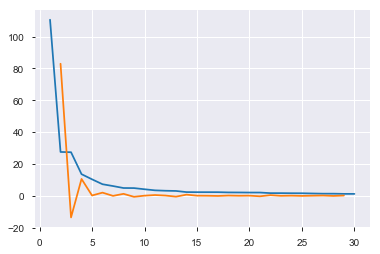

('clusters for ward method:', 2)


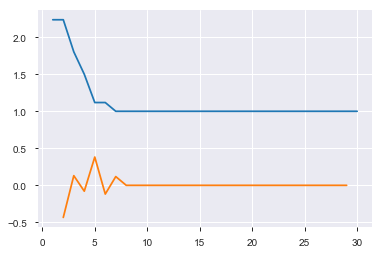

('clusters for single method:', 5)


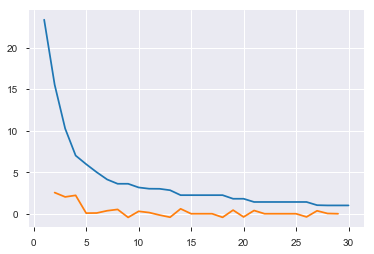

('clusters for complete method:', 2)


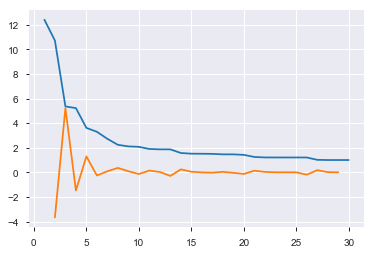

('clusters for average method:', 3)


In [67]:
lastward = ZwardApp2F1[-30:, 2]
last_revward = lastward[::-1]
idxsward = np.arange(1, len(lastward) + 1)
plt.plot(idxsward, last_revward)

accelerationward = np.diff(lastward, 2)  # 2nd derivative of the distances
acceleration_revward = accelerationward[::-1]
plt.plot(idxsward[:-2] + 1, acceleration_revward)
plt.show()
kward = acceleration_revward.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for ward method:", kward)

##
lastsingle = ZsingleApp2F1[-30:, 2]
last_revsingle = lastsingle[::-1]
idxssingle = np.arange(1, len(lastsingle) + 1)
plt.plot(idxssingle, last_revsingle)

accelerationsingle = np.diff(lastsingle, 2)  # 2nd derivative of the distances
acceleration_revsingle= accelerationsingle[::-1]
plt.plot(idxssingle[:-2] + 1, acceleration_revsingle)
plt.show()
ksingle = acceleration_revsingle.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for single method:", ksingle)

##
lastcomplete = ZcompleteApp2F1[-30:, 2]
last_revcomplete = lastcomplete[::-1]
idxscomplete = np.arange(1, len(lastcomplete) + 1)
plt.plot(idxscomplete, last_revcomplete)

accelerationcomplete = np.diff(lastcomplete, 2)  # 2nd derivative of the distances
acceleration_revcomplete = accelerationcomplete[::-1]
plt.plot(idxscomplete[:-2] + 1, acceleration_revcomplete)
plt.show()
kcomplete = acceleration_revcomplete.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for complete method:", kcomplete)

##
lastaverage = ZaverageApp2F1[-30:, 2]
last_revaverage = lastaverage[::-1]
idxsaverage = np.arange(1, len(lastaverage) + 1)
plt.plot(idxsaverage, last_revaverage)

accelerationaverage = np.diff(lastaverage, 2)  # 2nd derivative of the distances
acceleration_revaverage = accelerationaverage[::-1]
plt.plot(idxsaverage[:-2] + 1, acceleration_revaverage)
plt.show()
kaverage = acceleration_revaverage.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for average method:", kaverage)

In [70]:
len(clustersWardApp2F1)

500

In [71]:
# 2- Knowing k:

k=2
clustersWardApp2F1 = fcluster(ZwardApp2F1, k, criterion='maxclust')

secound_mappingWardApp2F1 = {case:cluster for case,
 cluster in enumerate(clustersWardApp2F1)}
final_mappingApp2WardF1 = {case:secound_mappingWardApp2F1[first_mappingApp2F1[case]]
 for case in first_mappingApp2F1}

dfResult3PhasesApp2Ward= dfFeature.copy()
dfResult3PhasesApp2Ward['BatchWard2Phase1']=final_mappingApp2WardF1.values()
#dfTotalResult['BatchWard2']=final_mappingWard.values()

In [73]:
dfResult3PhasesApp2Ward.groupby('BatchWard2Phase1')['HASHEDIMSI'].agg(len)

BatchWard2Phase1
1      955
2    44225
Name: HASHEDIMSI, dtype: int64

In [76]:
dfResult3PhasesApp2Ward.ix[dfResult3PhasesApp2Ward['BatchWard2Phase1']==1].head()

,HASHEDIMSI,TOTALAVTIVEDAYS,TOTALACTIVEWEEKS,MEDIAN_STAY,WEEKEND_SHOWUPCNT,WEEKDAYS_SHOWUPCNT,EARLYS,EVENINGS,LATES,EARLYEVENING,EARLYEVENINGLATE,EARLYEVENINGNOTLATE,NOTEARLYEVENINGNOTLATE,NOTEARLYNOTEVENINGLATE,BatchWard2Phase1
0,C5E90D6A6E8B3DFE3E700AE09033212C251BFA111CFBC3...,10,5,4.0,0,10,0,6,0,0,0,0,6,0,1
2,BF94223A3545D531E3829D04E1F63EA6B00B4FB7DF3430...,18,4,8.0,6,12,0,2,11,0,0,0,1,8,1
5,D0DB22B99CA15AC4261215EA2A979592A3856396EC61D4...,24,6,7.0,6,18,2,18,5,1,0,1,9,0,1
7,8F7DFEB0FE8CA40EFCCEC705C01DDED89D1240D5C2B38A...,20,5,4.0,0,20,2,15,0,1,0,1,14,0,1
12,A758BDD201098E5B6BEDA613E38BF2224B99F4E403B031...,14,4,5.0,1,13,2,9,0,1,0,1,7,0,1


## Phase 2 re-cluster shoppers

In [77]:
dfShoppers= dfResult3PhasesApp2Ward.ix[dfResult3PhasesApp2Ward['BatchWard2Phase1']==2].copy()
dfShoppers.shape

(44225, 15)

In [89]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=500, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)

clusterMiniBatchShp=mbk.fit(dfShoppers[['LATES']])
firstPhaseClusterShp=clusterMiniBatchShp.cluster_centers_ 
first_mappingShp = {case:cluster for case,
 cluster in enumerate(clusterMiniBatchShp.labels_)}

In [90]:
ZcompleteShp = linkage(firstPhaseClusterShp, method='complete')
ZwardShp = linkage(firstPhaseClusterShp, method='ward')
ZsingleShp = linkage(firstPhaseClusterShp, method='single')
ZaverageShp= linkage(firstPhaseClusterShp, method='average')

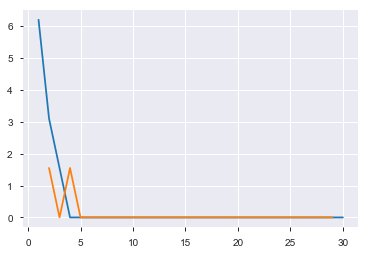

('clusters for ward method:', 2)


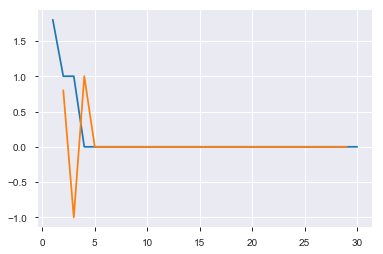

('clusters for single method:', 4)


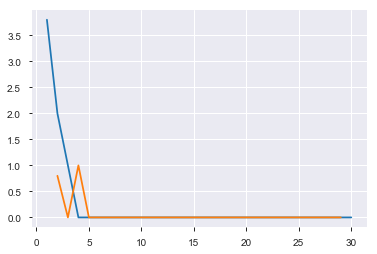

('clusters for complete method:', 4)


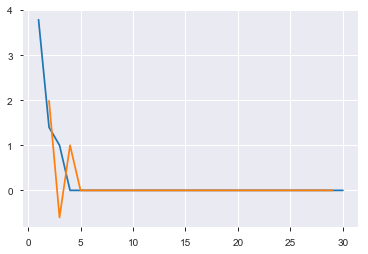

('clusters for average method:', 2)


In [91]:
lastward = ZwardShp[-30:, 2]
last_revward = lastward[::-1]
idxsward = np.arange(1, len(lastward) + 1)
plt.plot(idxsward, last_revward)

accelerationward = np.diff(lastward, 2)  # 2nd derivative of the distances
acceleration_revward = accelerationward[::-1]
plt.plot(idxsward[:-2] + 1, acceleration_revward)
plt.show()
kward = acceleration_revward.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for ward method:", kward)

##
lastsingle = ZsingleShp[-30:, 2]
last_revsingle = lastsingle[::-1]
idxssingle = np.arange(1, len(lastsingle) + 1)
plt.plot(idxssingle, last_revsingle)

accelerationsingle = np.diff(lastsingle, 2)  # 2nd derivative of the distances
acceleration_revsingle= accelerationsingle[::-1]
plt.plot(idxssingle[:-2] + 1, acceleration_revsingle)
plt.show()
ksingle = acceleration_revsingle.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for single method:", ksingle)

##
lastcomplete = ZcompleteShp[-30:, 2]
last_revcomplete = lastcomplete[::-1]
idxscomplete = np.arange(1, len(lastcomplete) + 1)
plt.plot(idxscomplete, last_revcomplete)

accelerationcomplete = np.diff(lastcomplete, 2)  # 2nd derivative of the distances
acceleration_revcomplete = accelerationcomplete[::-1]
plt.plot(idxscomplete[:-2] + 1, acceleration_revcomplete)
plt.show()
kcomplete = acceleration_revcomplete.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for complete method:", kcomplete)

##
lastaverage = ZaverageShp[-30:, 2]
last_revaverage = lastaverage[::-1]
idxsaverage = np.arange(1, len(lastaverage) + 1)
plt.plot(idxsaverage, last_revaverage)

accelerationaverage = np.diff(lastaverage, 2)  # 2nd derivative of the distances
acceleration_revaverage = accelerationaverage[::-1]
plt.plot(idxsaverage[:-2] + 1, acceleration_revaverage)
plt.show()
kaverage = acceleration_revaverage.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for average method:", kaverage)

In [92]:
# 2- Knowing k:

k=2
clustersWardShp = fcluster(ZwardShp, k, criterion='maxclust')

secound_mappingApp2WardShp = {case:cluster for case,
 cluster in enumerate(clustersWardShp)}
final_mappingApp2WardShp = {case:secound_mappingApp2WardShp[first_mappingShp[case]]
 for case in first_mappingShp}

dfResult3PhasesApp2Shp= dfShoppers.copy()
dfResult3PhasesApp2Shp['shpWard2Phase2']=final_mappingApp2WardShp.values()
#dfTotalResult['BatchWard2']=final_mappingWard.values()

In [93]:
dfResult3PhasesApp2Shp.groupby('shpWard2Phase2')['HASHEDIMSI'].agg(len)

shpWard2Phase2
1    41624
2     2601
Name: HASHEDIMSI, dtype: int64

In [94]:
dfResult3PhasesApp2Shp.ix[dfResult3PhasesApp2Shp['shpWard2Phase2']==2].head()

C:\Users\x190523\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,HASHEDIMSI,TOTALAVTIVEDAYS,TOTALACTIVEWEEKS,MEDIAN_STAY,WEEKEND_SHOWUPCNT,WEEKDAYS_SHOWUPCNT,EARLYS,EVENINGS,LATES,EARLYEVENING,EARLYEVENINGLATE,EARLYEVENINGNOTLATE,NOTEARLYEVENINGNOTLATE,NOTEARLYNOTEVENINGLATE,BatchWard2Phase1,shpWard2Phase2
37,EBD7F83E37CAEB7BBAC48DAECB84EE4787470868962446...,4,2,4.5,0,4,0,1,2,0,0,0,0,1,2,2
51,A9DC3952D6A6FBE316383408E2D107CE561B1791C5A054...,3,2,3.0,1,2,0,1,1,0,0,0,1,1,2,2
71,D205DD3CC0E0C03CA5B5522B2F20B1098A8EEC1896A130...,2,1,4.0,2,0,0,1,2,0,0,0,0,1,2,2
92,27DAB9B2CD910FE343800C3733267F72A5CBD60AE9A2C4...,1,1,1.0,0,1,0,0,1,0,0,0,0,1,2,2
121,DA37E2A2F45E4BEF6966E8D63FD250DA6622C0FEB779B9...,3,2,3.0,3,0,0,0,2,0,0,0,0,2,2,2


In [141]:
dfResult3PhasesApp2Shp['App2Cluster']=dfResult3PhasesApp2Shp['shpWard2Phase2']

In [142]:
dfResult3PhasesApp2Shp.shape

(44225, 17)

## staffs

In [95]:
dfStaffs= dfResult3PhasesApp2Ward.ix[dfResult3PhasesApp2Ward['BatchWard2Phase1']==1].copy()
dfStaffs.shape

(955, 15)

In [96]:
dfStaffs[['WEEKEND_SHOWUPCNT','WEEKDAYS_SHOWUPCNT','LATES']].head()

,WEEKEND_SHOWUPCNT,WEEKDAYS_SHOWUPCNT,LATES
0,0,10,0
2,6,12,11
5,6,18,5
7,0,20,0
12,1,13,0


In [159]:
ZcompleteStaff = linkage(dfStaffs[['WEEKEND_SHOWUPCNT','WEEKDAYS_SHOWUPCNT','LATES']], method='complete')
ZwardStaff = linkage(dfStaffs[['WEEKEND_SHOWUPCNT','WEEKDAYS_SHOWUPCNT','LATES']], method='ward')
ZsingleStaff = linkage(dfStaffs[['WEEKEND_SHOWUPCNT','WEEKDAYS_SHOWUPCNT','LATES']], method='single')
ZaverageStaff= linkage(dfStaffs[['WEEKEND_SHOWUPCNT','WEEKDAYS_SHOWUPCNT','LATES']], method='average')

In [128]:
len(ZcompleteStaff)

954

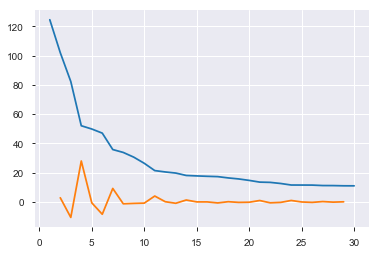

('clusters for ward method:', 4)


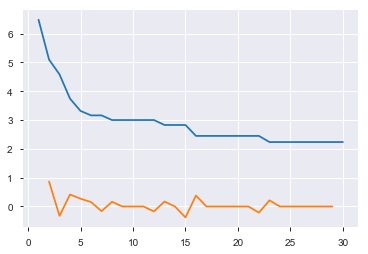

('clusters for single method:', 2)


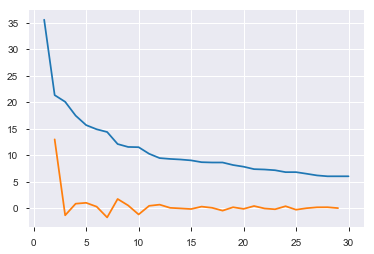

('clusters for complete method:', 2)


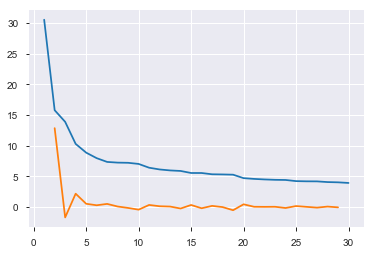

('clusters for average method:', 2)


In [129]:
lastward = ZwardStaff[-30:, 2]
last_revward = lastward[::-1]
idxsward = np.arange(1, len(lastward) + 1)
plt.plot(idxsward, last_revward)

accelerationward = np.diff(lastward, 2)  # 2nd derivative of the distances
acceleration_revward = accelerationward[::-1]
plt.plot(idxsward[:-2] + 1, acceleration_revward)
plt.show()
kward = acceleration_revward.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for ward method:", kward)

##
lastsingle = ZsingleStaff[-30:, 2]
last_revsingle = lastsingle[::-1]
idxssingle = np.arange(1, len(lastsingle) + 1)
plt.plot(idxssingle, last_revsingle)

accelerationsingle = np.diff(lastsingle, 2)  # 2nd derivative of the distances
acceleration_revsingle= accelerationsingle[::-1]
plt.plot(idxssingle[:-2] + 1, acceleration_revsingle)
plt.show()
ksingle = acceleration_revsingle.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for single method:", ksingle)

##
lastcomplete = ZcompleteStaff[-30:, 2]
last_revcomplete = lastcomplete[::-1]
idxscomplete = np.arange(1, len(lastcomplete) + 1)
plt.plot(idxscomplete, last_revcomplete)

accelerationcomplete = np.diff(lastcomplete, 2)  # 2nd derivative of the distances
acceleration_revcomplete = accelerationcomplete[::-1]
plt.plot(idxscomplete[:-2] + 1, acceleration_revcomplete)
plt.show()
kcomplete = acceleration_revcomplete.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for complete method:", kcomplete)

##
lastaverage = ZaverageStaff[-30:, 2]
last_revaverage = lastaverage[::-1]
idxsaverage = np.arange(1, len(lastaverage) + 1)
plt.plot(idxsaverage, last_revaverage)

accelerationaverage = np.diff(lastaverage, 2)  # 2nd derivative of the distances
acceleration_revaverage = accelerationaverage[::-1]
plt.plot(idxsaverage[:-2] + 1, acceleration_revaverage)
plt.show()
kaverage = acceleration_revaverage.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for average method:", kaverage)

In [130]:
# 2- Knowing k:

k=4
clustersWardStaffApp2 = fcluster(ZwardStaff, k, criterion='maxclust')


dfResult3PhasesApp2Staffs= dfStaffs.copy()
dfResult3PhasesApp2Staffs['StaffWard4Phase2']=clustersWardStaffApp2
#dfTotalResult['BatchWard2']=final_mappingWard.values()


In [131]:
dfResult3PhasesApp2Staffs.groupby('StaffWard4Phase2')['HASHEDIMSI'].agg(len)

StaffWard4Phase2
1    199
2    475
3    215
4     66
Name: HASHEDIMSI, dtype: int64

In [133]:
dfStaffCluster1= dfResult3PhasesApp2Staffs.ix[dfResult3PhasesApp2Staffs['StaffWard4Phase2']==1]
dfStaffCluster1.mean()

TOTALAVTIVEDAYS           12.271357
TOTALACTIVEWEEKS           4.603015
MEDIAN_STAY                2.527638
WEEKEND_SHOWUPCNT          4.065327
WEEKDAYS_SHOWUPCNT         8.206030
EARLYS                     0.442211
EVENINGS                   3.537688
LATES                      0.773869
EARLYEVENING               0.160804
EARLYEVENINGLATE           0.030151
EARLYEVENINGNOTLATE        0.130653
NOTEARLYEVENINGNOTLATE     2.924623
NOTEARLYNOTEVENINGLATE     0.452261
BatchWard2Phase1           1.000000
StaffWard4Phase2           1.000000
dtype: float64

In [134]:
dfStaffCluster2= dfResult3PhasesApp2Staffs.ix[dfResult3PhasesApp2Staffs['StaffWard4Phase2']==2]
dfStaffCluster2.mean()

TOTALAVTIVEDAYS           11.821053
TOTALACTIVEWEEKS           4.450526
MEDIAN_STAY                3.436842
WEEKEND_SHOWUPCNT          0.387368
WEEKDAYS_SHOWUPCNT        11.433684
EARLYS                     1.427368
EVENINGS                   3.955789
LATES                      0.338947
EARLYEVENING               0.524211
EARLYEVENINGLATE           0.016842
EARLYEVENINGNOTLATE        0.501053
NOTEARLYEVENINGNOTLATE     3.046316
NOTEARLYNOTEVENINGLATE     0.151579
BatchWard2Phase1           1.000000
StaffWard4Phase2           2.000000
dtype: float64

In [135]:
dfStaffCluster3= dfResult3PhasesApp2Staffs.ix[dfResult3PhasesApp2Staffs['StaffWard4Phase2']==3]
dfStaffCluster3.mean()

TOTALAVTIVEDAYS           18.186047
TOTALACTIVEWEEKS           4.869767
MEDIAN_STAY                5.065116
WEEKEND_SHOWUPCNT          1.953488
WEEKDAYS_SHOWUPCNT        16.232558
EARLYS                     2.920930
EVENINGS                   8.455814
LATES                      1.548837
EARLYEVENING               1.567442
EARLYEVENINGLATE           0.144186
EARLYEVENINGNOTLATE        1.339535
NOTEARLYEVENINGNOTLATE     5.293023
NOTEARLYNOTEVENINGLATE     0.488372
BatchWard2Phase1           1.000000
StaffWard4Phase2           3.000000
dtype: float64

In [136]:
dfStaffCluster4= dfResult3PhasesApp2Staffs.ix[dfResult3PhasesApp2Staffs['StaffWard4Phase2']==4]
dfStaffCluster4.mean()

TOTALAVTIVEDAYS           17.681818
TOTALACTIVEWEEKS           4.681818
MEDIAN_STAY                8.333333
WEEKEND_SHOWUPCNT          3.833333
WEEKDAYS_SHOWUPCNT        13.848485
EARLYS                     3.424242
EVENINGS                   8.424242
LATES                     11.227273
EARLYEVENING               2.590909
EARLYEVENINGLATE           2.454545
EARLYEVENINGNOTLATE        0.121212
NOTEARLYEVENINGNOTLATE     2.060606
NOTEARLYNOTEVENINGLATE     3.984848
BatchWard2Phase1           1.000000
StaffWard4Phase2           4.000000
dtype: float64

In [137]:
dfResult3PhasesApp2Staffs.head()

,HASHEDIMSI,TOTALAVTIVEDAYS,TOTALACTIVEWEEKS,MEDIAN_STAY,WEEKEND_SHOWUPCNT,WEEKDAYS_SHOWUPCNT,EARLYS,EVENINGS,LATES,EARLYEVENING,EARLYEVENINGLATE,EARLYEVENINGNOTLATE,NOTEARLYEVENINGNOTLATE,NOTEARLYNOTEVENINGLATE,BatchWard2Phase1,StaffWard4Phase2
0,C5E90D6A6E8B3DFE3E700AE09033212C251BFA111CFBC3...,10,5,4.0,0,10,0,6,0,0,0,0,6,0,1,2
2,BF94223A3545D531E3829D04E1F63EA6B00B4FB7DF3430...,18,4,8.0,6,12,0,2,11,0,0,0,1,8,1,4
5,D0DB22B99CA15AC4261215EA2A979592A3856396EC61D4...,24,6,7.0,6,18,2,18,5,1,0,1,9,0,1,3
7,8F7DFEB0FE8CA40EFCCEC705C01DDED89D1240D5C2B38A...,20,5,4.0,0,20,2,15,0,1,0,1,14,0,1,3
12,A758BDD201098E5B6BEDA613E38BF2224B99F4E403B031...,14,4,5.0,1,13,2,9,0,1,0,1,7,0,1,2


In [138]:
dfResult3PhasesApp2Staffs['App2Cluster']=dfResult3PhasesApp2Staffs['StaffWard4Phase2'].apply(lambda x: x+2)


In [140]:
dfResult3PhasesApp2Staffs['App2Cluster'].min()

3

In [143]:
dfResult3PhasesApp2Staffs.shape

(955, 17)

In [ ]:
# concat shp and staffs

In [148]:
frames = [dfResult3PhasesApp2Shp.ix[:,dfResult3PhasesApp2Shp.columns!='shpWard2Phase2'], dfResult3PhasesApp2Staffs.ix[:, dfResult3PhasesApp2Staffs.columns!='StaffWard4Phase2']]
dfResultApp2 = pd.concat(frames)

In [149]:
dfResultApp2.shape

(45180, 16)

In [151]:
filePathResultApp2= r'C:\Users\x190523\Farnoosh\Cadillac fairview\Clustering\pacific\App2PacificF.csv'
dfResultApp2.to_csv(filePathResultApp2, index= False)

In [166]:
dfShpStf=dfResult3PhasesApp2Shp[ dfResult3PhasesApp2Shp.App2Cluster==2]

In [167]:
dfShpStf.shape

(2601, 17)

In [168]:
dfShpStf.head()

,HASHEDIMSI,TOTALAVTIVEDAYS,TOTALACTIVEWEEKS,MEDIAN_STAY,WEEKEND_SHOWUPCNT,WEEKDAYS_SHOWUPCNT,EARLYS,EVENINGS,LATES,EARLYEVENING,EARLYEVENINGLATE,EARLYEVENINGNOTLATE,NOTEARLYEVENINGNOTLATE,NOTEARLYNOTEVENINGLATE,BatchWard2Phase1,shpWard2Phase2,App2Cluster
37,EBD7F83E37CAEB7BBAC48DAECB84EE4787470868962446...,4,2,4.5,0,4,0,1,2,0,0,0,0,1,2,2,2
51,A9DC3952D6A6FBE316383408E2D107CE561B1791C5A054...,3,2,3.0,1,2,0,1,1,0,0,0,1,1,2,2,2
71,D205DD3CC0E0C03CA5B5522B2F20B1098A8EEC1896A130...,2,1,4.0,2,0,0,1,2,0,0,0,0,1,2,2,2
92,27DAB9B2CD910FE343800C3733267F72A5CBD60AE9A2C4...,1,1,1.0,0,1,0,0,1,0,0,0,0,1,2,2,2
121,DA37E2A2F45E4BEF6966E8D63FD250DA6622C0FEB779B9...,3,2,3.0,3,0,0,0,2,0,0,0,0,2,2,2,2


In [169]:
dfShpStf[['EARLYS','LATES']].shape

(2601, 2)

In [177]:
ZcompleteShpStf = linkage(dfShpStf[['LATES']], method='complete')
ZwardShpStf = linkage(dfShpStf[['LATES']], method='ward')
ZsingleShpStf = linkage(dfShpStf[['LATES']], method='single')
ZaverageShpStf= linkage(dfShpStf[['LATES']], method='average')

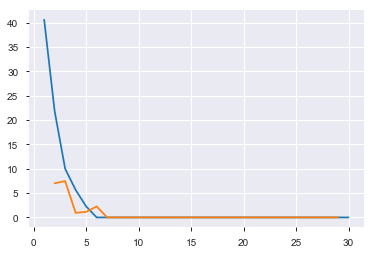

('clusters for ward method:', 3)


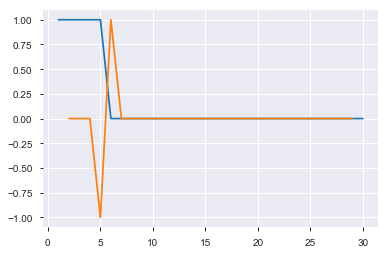

('clusters for single method:', 6)


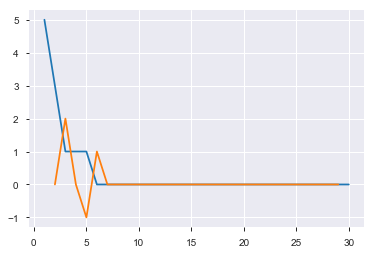

('clusters for complete method:', 3)


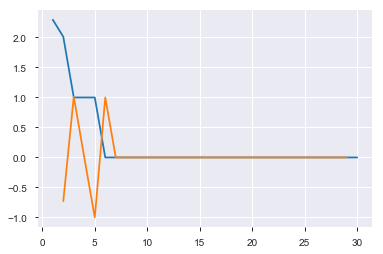

('clusters for average method:', 3)


In [178]:
lastward = ZwardShpStf[-30:, 2]
last_revward = lastward[::-1]
idxsward = np.arange(1, len(lastward) + 1)
plt.plot(idxsward, last_revward)

accelerationward = np.diff(lastward, 2)  # 2nd derivative of the distances
acceleration_revward = accelerationward[::-1]
plt.plot(idxsward[:-2] + 1, acceleration_revward)
plt.show()
kward = acceleration_revward.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for ward method:", kward)

##
lastsingle = ZsingleShpStf[-30:, 2]
last_revsingle = lastsingle[::-1]
idxssingle = np.arange(1, len(lastsingle) + 1)
plt.plot(idxssingle, last_revsingle)

accelerationsingle = np.diff(lastsingle, 2)  # 2nd derivative of the distances
acceleration_revsingle= accelerationsingle[::-1]
plt.plot(idxssingle[:-2] + 1, acceleration_revsingle)
plt.show()
ksingle = acceleration_revsingle.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for single method:", ksingle)

##
lastcomplete = ZcompleteShpStf[-30:, 2]
last_revcomplete = lastcomplete[::-1]
idxscomplete = np.arange(1, len(lastcomplete) + 1)
plt.plot(idxscomplete, last_revcomplete)

accelerationcomplete = np.diff(lastcomplete, 2)  # 2nd derivative of the distances
acceleration_revcomplete = accelerationcomplete[::-1]
plt.plot(idxscomplete[:-2] + 1, acceleration_revcomplete)
plt.show()
kcomplete = acceleration_revcomplete.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for complete method:", kcomplete)

##
lastaverage = ZaverageShpStf[-30:, 2]
last_revaverage = lastaverage[::-1]
idxsaverage = np.arange(1, len(lastaverage) + 1)
plt.plot(idxsaverage, last_revaverage)

accelerationaverage = np.diff(lastaverage, 2)  # 2nd derivative of the distances
acceleration_revaverage = accelerationaverage[::-1]
plt.plot(idxsaverage[:-2] + 1, acceleration_revaverage)
plt.show()
kaverage = acceleration_revaverage.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters for average method:", kaverage)

In [183]:
dfShpStf.shape

(2601, 19)

In [181]:
# 2- Knowing k:

k=3
clustersWardShpStfApp2 = fcluster(ZwardShpStf, k, criterion='maxclust')


#dfShpStf= dfStaffs.copy()
dfShpStf['ShpStfWard3Phase2']=clustersWardShpStfApp2
#dfTotalResult['BatchWard2']=final_mappingWard.values()


C:\Users\x190523\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
dfShpStf.groupby('ShpStfWard3Phase2')['HASHEDIMSI'].agg(len)

ShpStfWard3Phase2
1    1892
2     587
3     122
Name: HASHEDIMSI, dtype: int64

In [186]:
dfShpStfCluster3= dfShpStf.ix[dfShpStf['ShpStfWard3Phase2']==3]
dfShpStfCluster3.mean()

TOTALAVTIVEDAYS           5.040984
TOTALACTIVEWEEKS          2.516393
MEDIAN_STAY               5.409836
WEEKEND_SHOWUPCNT         1.262295
WEEKDAYS_SHOWUPCNT        3.778689
EARLYS                    0.745902
EVENINGS                  1.147541
LATES                     3.532787
EARLYEVENING              0.303279
EARLYEVENINGLATE          0.303279
EARLYEVENINGNOTLATE       0.000000
NOTEARLYEVENINGNOTLATE    0.311475
NOTEARLYNOTEVENINGLATE    2.073770
BatchWard2Phase1          2.000000
shpWard2Phase2            2.000000
App2Cluster               2.000000
ShpStfWard2Phase2         2.000000
ShpStfWard3Phase2         3.000000
dtype: float64

In [187]:
dfShpStfCluster2= dfShpStf.ix[dfShpStf['ShpStfWard3Phase2']==2]
dfShpStfCluster2.mean()

TOTALAVTIVEDAYS           2.908007
TOTALACTIVEWEEKS          1.698467
MEDIAN_STAY               4.525554
WEEKEND_SHOWUPCNT         0.773424
WEEKDAYS_SHOWUPCNT        2.134583
EARLYS                    0.301533
EVENINGS                  0.630324
LATES                     2.000000
EARLYEVENING              0.071550
EARLYEVENINGLATE          0.057922
EARLYEVENINGNOTLATE       0.013629
NOTEARLYEVENINGNOTLATE    0.247019
NOTEARLYNOTEVENINGLATE    1.296422
BatchWard2Phase1          2.000000
shpWard2Phase2            2.000000
App2Cluster               2.000000
ShpStfWard2Phase2         2.000000
ShpStfWard3Phase2         2.000000
dtype: float64